In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
df=pd.DataFrame(data=housing.data,columns=housing.feature_names)
df[housing.target_names[0]]=housing.target

# Transformacion logaritmica
Compensa sesgo positivo
$$
X'=\log(X).
$$

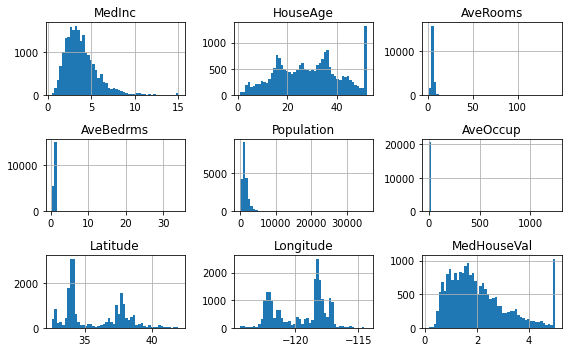

In [2]:
h=df.hist(bins=50,figsize=(8,5))
plt.tight_layout()

In [3]:
df.skew()

MedInc          1.646657
HouseAge        0.060331
AveRooms       20.697869
AveBedrms      31.316956
Population      4.935858
AveOccup       97.639561
Latitude        0.465953
Longitude      -0.297801
MedHouseVal     0.977763
dtype: float64

In [5]:
df.AveOccup.max()

1243.3333333333333

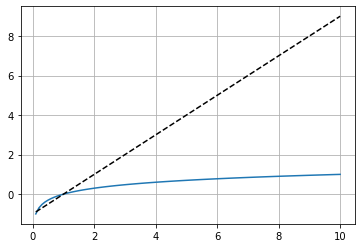

In [7]:
# Grafica X vs X'
X=np.linspace(0.1,10,100)
Xp=np.log10(X)
plt.plot(X,Xp)
plt.plot(X,X-1,'--k')
plt.grid()

In [12]:
df_t=df.copy()
df_t=np.log10(df-df.min()+1)
df.skew(),df_t.skew()

(MedInc          1.646657
 HouseAge        0.060331
 AveRooms       20.697869
 AveBedrms      31.316956
 Population      4.935858
 AveOccup       97.639561
 Latitude        0.465953
 Longitude      -0.297801
 MedHouseVal     0.977763
 dtype: float64, MedInc         0.078282
 HouseAge      -1.289170
 AveRooms       0.959245
 AveBedrms      8.298256
 Population    -1.140433
 AveOccup       2.662098
 Latitude      -0.080214
 Longitude     -0.745362
 MedHouseVal    0.237146
 dtype: float64)

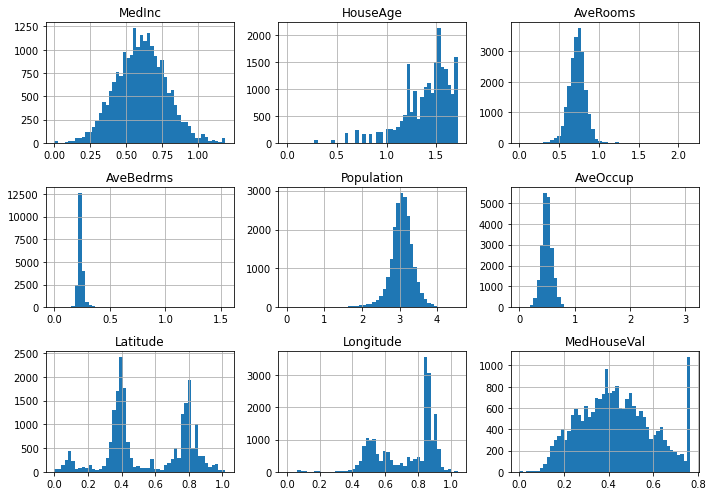

In [15]:
df_t.hist(bins=50,figsize=(10,7))
plt.tight_layout()

# Transformación recíproca
Compensa sesgo positivo muy pronunciado
$$
X'=\frac{1}{X}.
$$

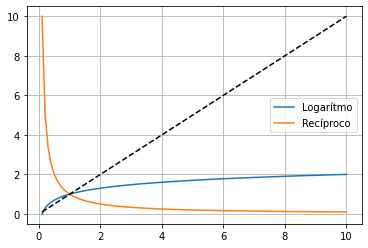

In [16]:
# Comparación entre log y recíproco
plt.plot(X,Xp+1,label='Logarítmo')
plt.plot(X,1/X,label='Recíproco')
plt.plot(X,X,'--k')
plt.legend()
plt.grid()

In [23]:
df_r=df.copy()
df_r=1/(df-df.min()+1)
df.skew(),df_r.skew()

(MedInc          1.646657
 HouseAge        0.060331
 AveRooms       20.697869
 AveBedrms      31.316956
 Population      4.935858
 AveOccup       97.639561
 Latitude        0.465953
 Longitude      -0.297801
 MedHouseVal     0.977763
 dtype: float64, MedInc          1.329928
 HouseAge        5.719626
 AveRooms        1.864921
 AveBedrms      -3.911728
 Population     80.838678
 AveOccup        0.612341
 Latitude        1.097306
 Longitude       2.185543
 MedHouseVal     0.507905
 dtype: float64)

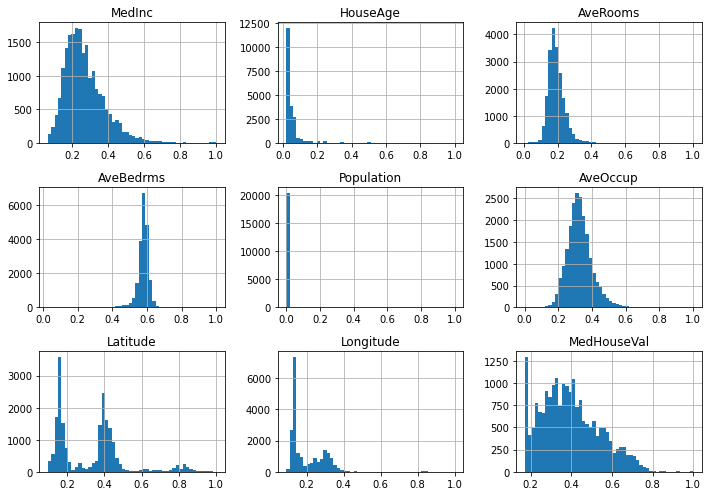

In [24]:
df_r.hist(bins=50,figsize=(10,7))
plt.tight_layout()

# Regresión